# 1. Feature Scaling

### Q1. What is feature scaling?

In [3]:
# Feature Scaling is a technique to standardize the independent features present in the data in a fixed range

### Q2. Why do we need feature scaling?

In [4]:
# To avoid large value differences

### Q3. Types of feature scaling?

In [5]:
# Standardization
# Normalization

## 1.1 Standardization

In [10]:
# Also called Z-Score Normalization

# Involves:
# a. Mean centering
# b. Scaling by the factor of std. dev. 

In [13]:
# Formula:

# Xi' = (Xi - mean(X)) / std. dev.

# After standardization, mean becomes 0(mean centering) and std. dev. becomes 1. 
# If std. dev. before was > 1, then squishing happens after standardization or if std. dev. before was < 1, 
# then spreading happens.

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
df = pd.read_csv('Datasets/Social_Network_Ads/Social_Network_Ads.csv')

In [70]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [71]:
df = df.iloc[:, 2:]

In [72]:
df.sample(5)

,Age,EstimatedSalary,Purchased
271,59,76000,1
145,24,89000,0
92,26,15000,0
100,27,88000,0
262,55,125000,1


##### Before and feature scaling like standardization or normalization it is recommended to perform train/test split

### Train/Test Split

In [6]:
from sklearn.model_selection import train_test_split

In [136]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis = 1), df['Purchased'], test_size = 0.3, 
                                                    random_state = 0)

X_train.shape, X_test.shape


KeyboardInterrupt



In [8]:
X_train.sample(5)

,Age,EstimatedSalary
311,39,96000
258,58,95000
3,27,57000
80,30,80000
2,26,43000


### StandardScaler

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler object to the train set, it will learn the parameters for all columns: mean, std. dev.
scaler.fit(X_train)

# transform train and test sets
# Learn parameters from train only, but transform both train and test
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [11]:
type(X_train_scaled)

numpy.ndarray

##### StandardScaler takes in dataframe as input but returns numpy array as output

##### So, numpy array needs to be converted back to dataframe

In [12]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [13]:
type(X_train_scaled)

pandas.core.frame.DataFrame

In [14]:
X_train_scaled.sample(5)

,Age,EstimatedSalary
75,0.209385,0.236930
156,1.974102,0.728553
80,-0.967093,-0.312532
144,1.287823,1.856396
55,0.993704,1.972072


##### Comparing if scaling happened or not

In [15]:
np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [16]:
np.round(X_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


### Effect of Scaling

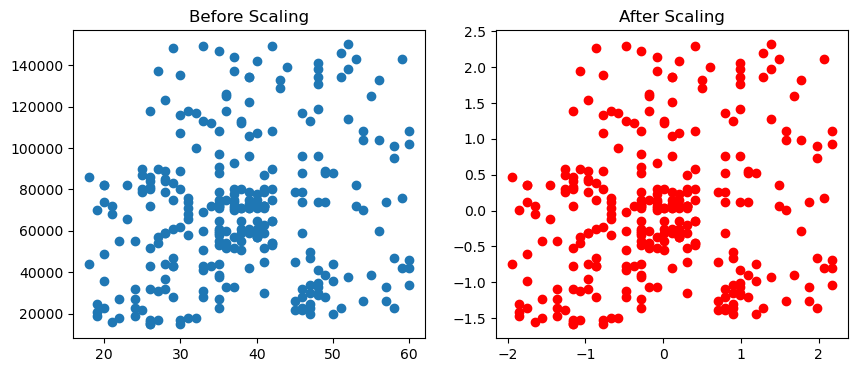

In [22]:
# plt.subplots(ncols=2, figsize=(10, 5)): This part of the code is creating a figure and a set of subplots within that 
# figure. It specifies that there will be 2 columns of subplots (ncols=2), meaning there will be two plots side by side 
# horizontally. It also sets the size of the figure to be 10 units wide and 5 units tall (figsize=(10, 5)).

# fig, (ax1, ax2) = ...: This part of the code unpacks the result of plt.subplots() into two variables: fig and a tuple 
# (ax1, ax2).

# fig represents the entire figure, which is the container holding all the subplots.
# (ax1, ax2) represents the individual subplots created within the figure. ax1 is the first subplot (leftmost), and ax2 
# is the second subplot (rightmost).

fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (10, 4))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title('Before Scaling')

ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'], color = 'red')
ax2.set_title('After Scaling')

plt.show()

#### Plotting PDF's

C:\Users\Hardsty1e\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Hardsty1e\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Hardsty1e\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Hardsty1e\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

<Axes: title={'center': 'After Scaling'}, xlabel='Age', ylabel='Density'>

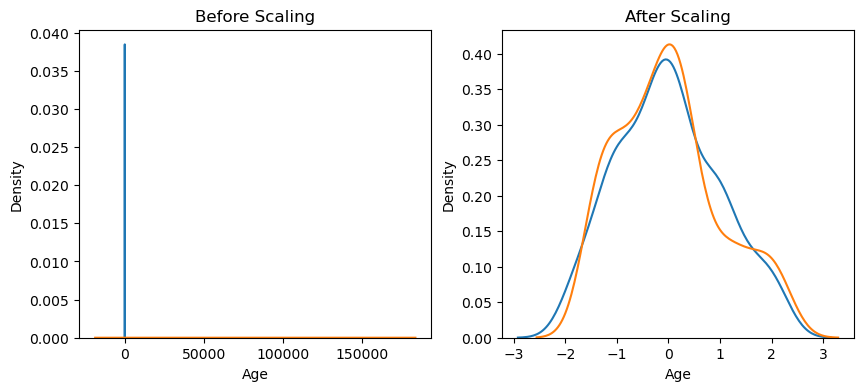

In [24]:
# Plotting PDF's

fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (10, 4))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax = ax1)    
# The ax=ax1 parameter specifies that the plot should be drawn on the first subplot (ax1).
sns.kdeplot(X_train['EstimatedSalary'], ax = ax1)

# after scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Age'], ax = ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax = ax2)

#### Comparison of distributions

##### Both the below graphs show that the distribution of each feature remains the same, but the scale changes

C:\Users\Hardsty1e\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Hardsty1e\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


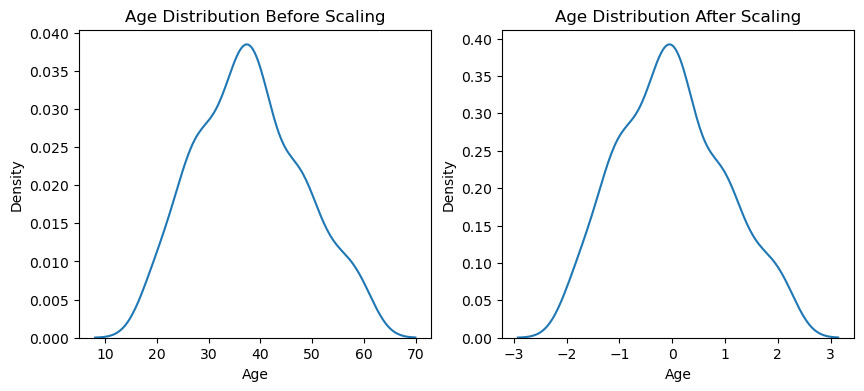

In [29]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (10, 4))

# Before Scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax = ax1)

# After Scaling
ax2.set_title('Age Distribution After Scaling')
sns.kdeplot(X_train_scaled['Age'], ax = ax2)

plt.show()

C:\Users\Hardsty1e\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Hardsty1e\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


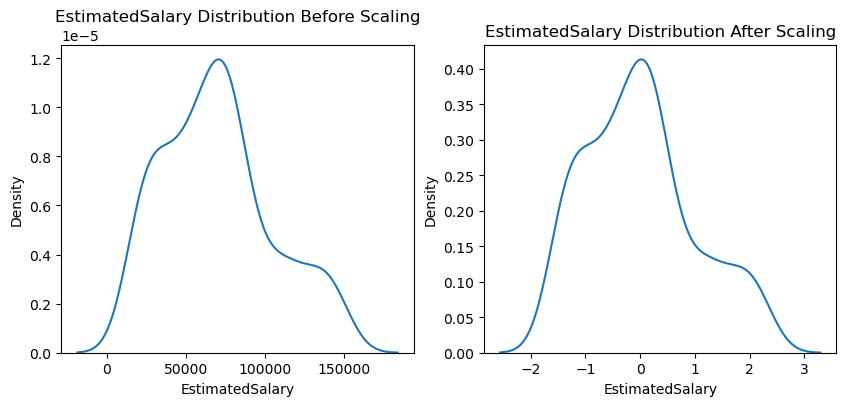

In [30]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (10, 4))

# Before Scaling
ax1.set_title('EstimatedSalary Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax = ax1)

# After Scaling
ax2.set_title('EstimatedSalary Distribution After Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax = ax2)

plt.show()

# Why scaling is important?

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [33]:
lr.fit(X_train, y_train)
lr_scaled.fit(X_train_scaled, y_train)

LogisticRegression()

In [34]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [36]:
from sklearn.metrics import accuracy_score

In [39]:
print('Actual', accuracy_score(y_test, y_pred))
print('Scaled', accuracy_score(y_test, y_pred_scaled))

Actual 0.6583333333333333
Scaled 0.8666666666666667


##### This proves scaling is important. There is no cons associated with scaling. Depending on the algorithm it might be beneficial.

In [40]:
# Decision Tree algo does not require scaling

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [43]:
dt.fit(X_train, y_train)
dt_scaled.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [44]:
y_pred = dt.predict(X_test)
y_pred_scaled= dt_scaled.predict(X_test_scaled)

In [45]:
print('Actual', accuracy_score(y_test, y_pred))
print('Scaled', accuracy_score(y_test, y_pred_scaled))

Actual 0.875
Scaled 0.8666666666666667


In [81]:
# Very similar

##### Outliers will stay in data even after scaling. Therefore, they need to be taken care of regardless of standardization.

# When to use standardization?

In [82]:
# K-Means
# K-Nearest-Neighbors
# Principal Component Analysis(PCA)
# Artificial Neural Network
# Gradient Descent

## 1. 2 Normalization

#### The goal of nomalization is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information.

### Types:
#### 1. Min max scaling
#### 2. Mean Normalization
#### 3. Max absolute scaling
#### 4. Robust scaling

##### 90% times min max scaling is used

## 1. Min max scaling

In [85]:
# Xi' = (Xi - Xmin) / (Xmax - Xmin)

# All values change ranges into a unit line/rectangle/cube/hypercube

In [96]:
df = pd.read_csv('Datasets/Wine/wine_data.csv', header = None, usecols = [0, 1, 2])
df.columns = ['Class label', 'Alcohol', 'Malic acid']

In [97]:
df.sample(5)

,Class label,Alcohol,Malic acid
43,1,13.24,3.98
114,2,12.08,1.39
91,2,12.00,1.51
54,1,13.74,1.67
52,1,13.82,1.75


C:\Users\Hardsty1e\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Alcohol', ylabel='Density'>

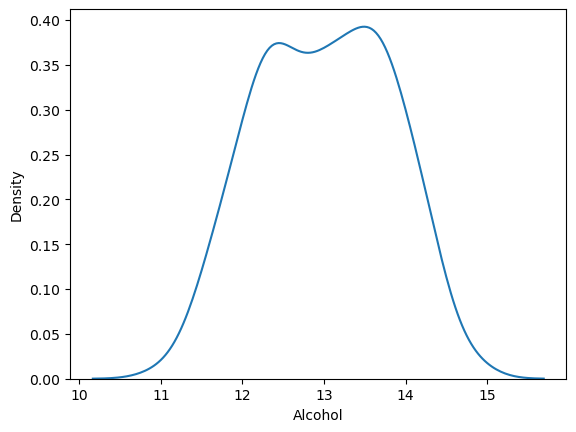

In [98]:
sns.kdeplot(df['Alcohol'])

C:\Users\Hardsty1e\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Malic acid', ylabel='Density'>

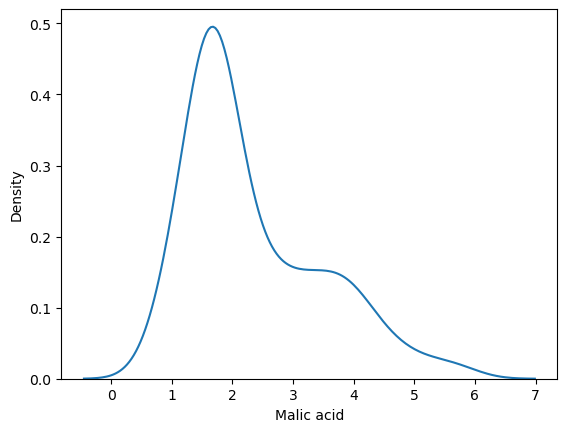

In [99]:
sns.kdeplot(df['Malic acid'])

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

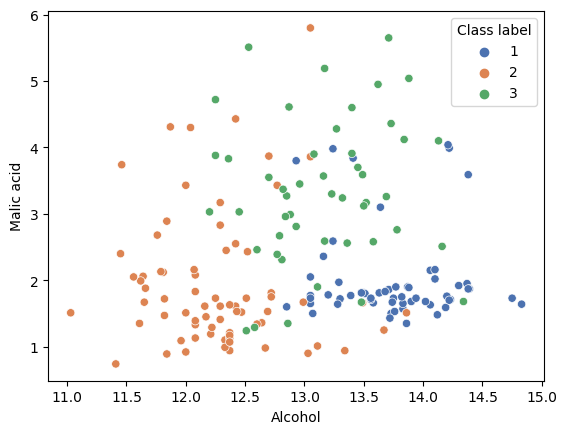

In [114]:
sns.scatterplot(df, x = 'Alcohol', y = 'Malic acid', hue = df['Class label'], palette = 'deep')

In [115]:
from sklearn.model_selection import train_test_split

In [116]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class label', axis = 1), df['Class label'], test_size = 0.3,
                                                   random_state = 0)

X_train.shape, X_test.shape

((124, 2), (54, 2))

In [119]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [120]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [121]:
np.round(X_train.describe(), 1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [122]:
np.round(X_train_scaled.describe(), 1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


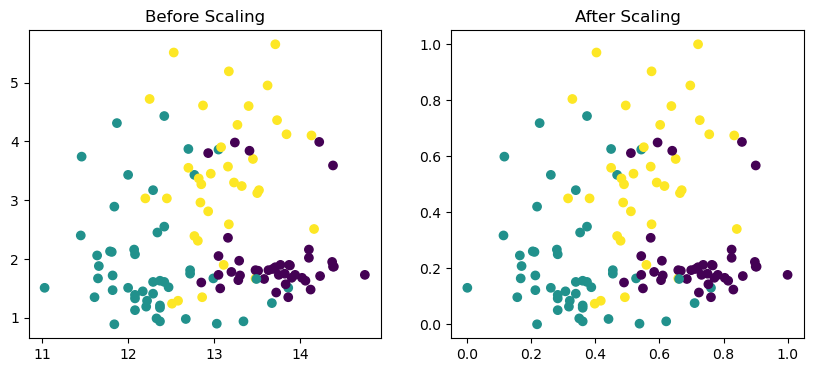

In [126]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (10, 4))

ax1.scatter(X_train['Alcohol'], X_train['Malic acid'], c = y_train)
ax1.set_title('Before Scaling')

ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic acid'], c = y_train)
ax2.set_title('After Scaling')

plt.show()

C:\Users\Hardsty1e\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Hardsty1e\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Hardsty1e\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Hardsty1e\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

<Axes: title={'center': 'After Scaling'}, xlabel='Alcohol', ylabel='Density'>

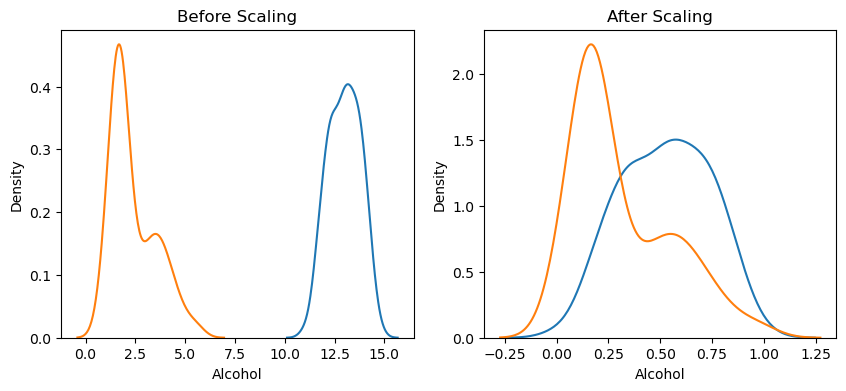

In [127]:
# Plotting PDF's

fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (10, 4))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax = ax1)    
# The ax=ax1 parameter specifies that the plot should be drawn on the first subplot (ax1).
sns.kdeplot(X_train['Malic acid'], ax = ax1)

# after scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax = ax2)
sns.kdeplot(X_train_scaled['Malic acid'], ax = ax2)

C:\Users\Hardsty1e\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Hardsty1e\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


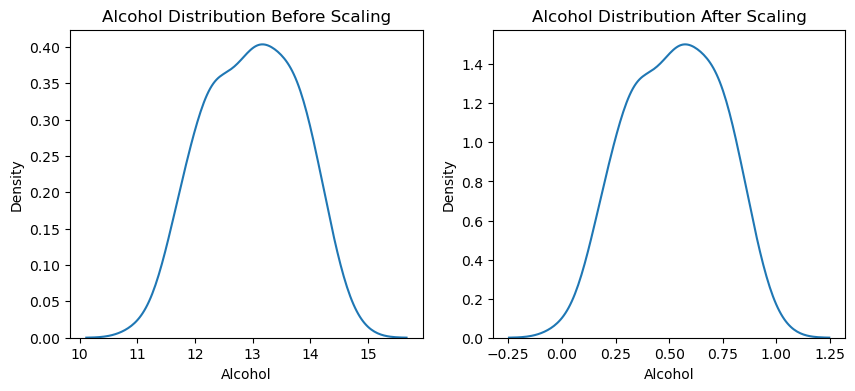

In [128]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (10, 4))

# Before Scaling
ax1.set_title('Alcohol Distribution Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax = ax1)

# After Scaling
ax2.set_title('Alcohol Distribution After Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax = ax2)

plt.show()

C:\Users\Hardsty1e\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Hardsty1e\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


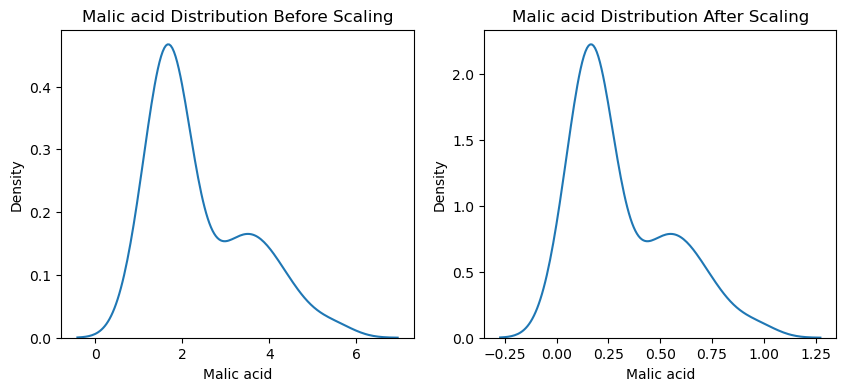

In [129]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (10, 4))

# Before Scaling
ax1.set_title('Malic acid Distribution Before Scaling')
sns.kdeplot(X_train['Malic acid'], ax = ax1)

# After Scaling
ax2.set_title('Malic acid Distribution After Scaling')
sns.kdeplot(X_train_scaled['Malic acid'], ax = ax2)

plt.show()

## 2. Mean Normalization

In [131]:
# Xi' = (Xi - Xmean) / (Xmax - Xmin)    
# Mean centering
# Range lies from -1 and 1
# Useful where algos require centered data

## 3. MaxAbsScaling

In [133]:
# Xi' = Xi / |Xmax|
# Used where sparse matrices or a lot of zero's present in data

## 4. Robust Scaling

In [134]:
# Xi' = (Xi - Xmedian) / IQR
# IQR = 75th percentile value - 25th percentile value

# Generally performs best when data has a lot of outliers

# Normalization vs Standardization

## Q1. Is feature scaling required?

## Q2. Standardization or Normalization?

In [135]:
# Most problems can be solved by standardization, that's why standard scaler class is used a lot.
# Min max scaler Normalization is used when you already know the min and max value of data. e.g. CNN, image data